In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import math

np.random.seed(56)

In [2]:
housing_data = pd.read_csv('data/housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Text(0, 0.5, 'Median house value')

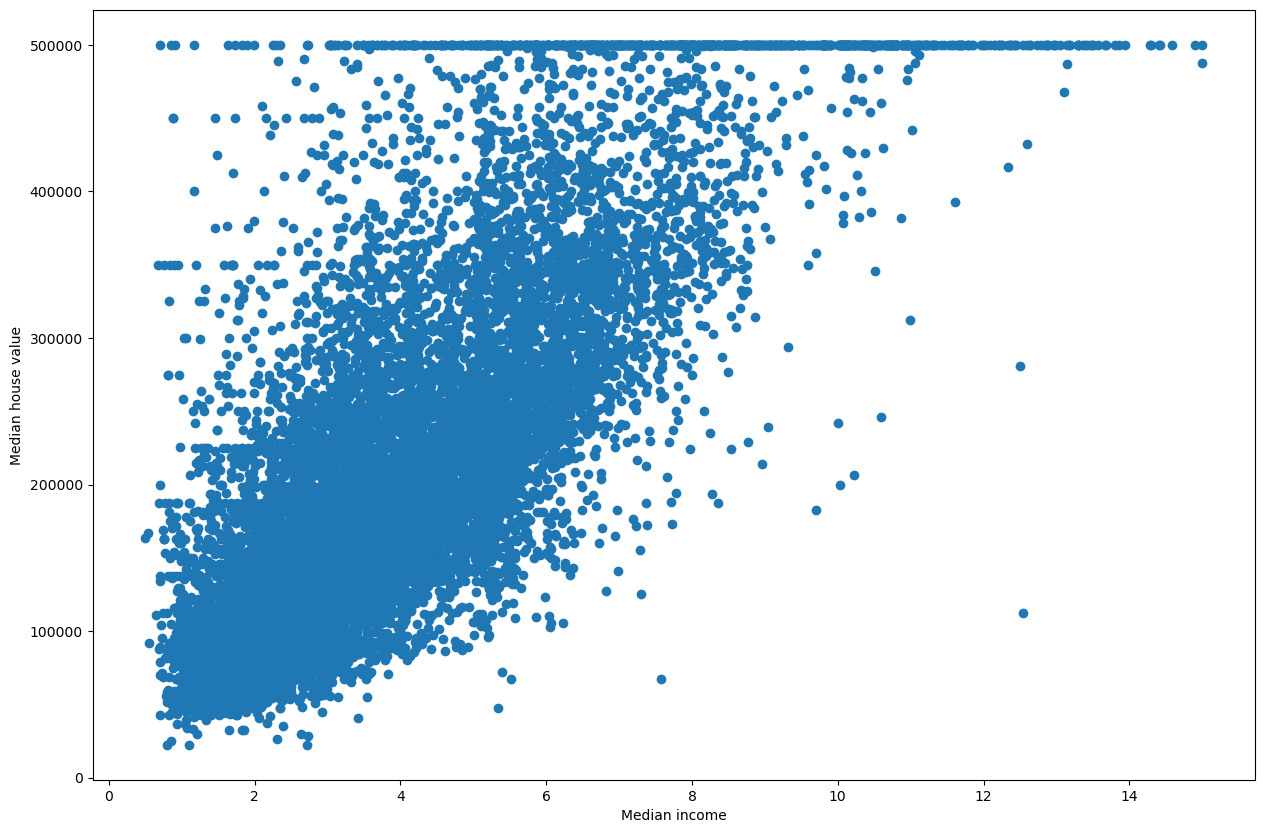

In [3]:
income_list = list(housing_data.median_income.unique())

median_house_value = []
for i in income_list:
    x=housing_data[housing_data.median_income==i]
    housevalue_average=sum(x.median_house_value)/len(x)
    median_house_value.append(housevalue_average)

df1 = pd.DataFrame({'income_list':income_list, 'median_house_value':median_house_value})
new_index = df1.median_house_value.sort_values(ascending=False).index.values
sorted_data_income = df1.reindex(new_index)

plt.figure(figsize=(15,10))
plt.scatter(sorted_data_income.income_list,sorted_data_income.median_house_value)

plt.xlabel('Median income')
plt.ylabel('Median house value')

In [4]:
# why is there a line at $500k

In [5]:
above_500k = df1[(df1['median_house_value'] > 499999)]
above_500k.head(10)

,income_list,median_house_value
437,1.1696,500001.0
469,7.8521,500001.0
470,9.3959,500001.0
484,7.8772,500001.0
485,11.8603,500001.0
486,13.4990,500001.0
487,12.2138,500001.0
489,12.3804,500001.0
492,8.7477,500001.0
858,9.7194,500001.0


In [6]:
# okay... well...
# on kaggle other users pointed this out, some said they just omitted those rows since the house values aren't accurate

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
clustering_income = housing_data[['median_income','median_house_value']]

scaler = StandardScaler()
norm_income = scaler.fit_transform(clustering_income)

pca = PCA(whiten = True)
low_income = pca.fit_transform(norm_income)

print(low_income)

[[ 2.43507938  0.27236992]
 [ 1.98445927  1.28893857]
 [ 1.65520238  0.66341576]
 ...
 [-1.16210556 -0.189713  ]
 [-1.15005184  0.00509653]
 [-0.97852085  0.30100065]]


In [9]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

In [10]:
bw = estimate_bandwidth(low_income)
print(bw)

1.1818908649921034


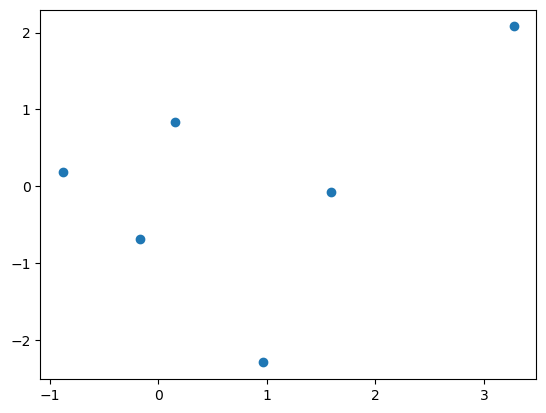

In [13]:
km = KMeans(6)
km.fit(low_income)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

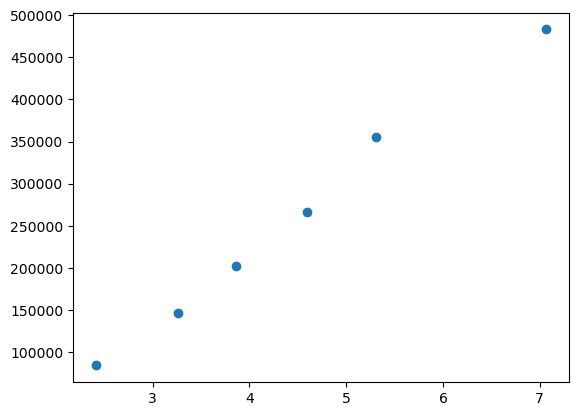

In [14]:
km = KMeans(6)
km.fit(clustering_income)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [15]:
latitude_data = housing_data[['latitude','median_house_value','ocean_proximity']]
latitude_data.head(10)

,latitude,median_house_value,ocean_proximity
0,37.88,452600.0,NEAR BAY
1,37.86,358500.0,NEAR BAY
2,37.85,352100.0,NEAR BAY
3,37.85,341300.0,NEAR BAY
4,37.85,342200.0,NEAR BAY
5,37.85,269700.0,NEAR BAY
6,37.84,299200.0,NEAR BAY
7,37.84,241400.0,NEAR BAY
8,37.84,226700.0,NEAR BAY
9,37.84,261100.0,NEAR BAY


In [16]:
m1 = MeanShift(bandwidth=bw)
m1.fit(clustering_latitude)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])

NameError: name 'clustering_latitude' is not defined

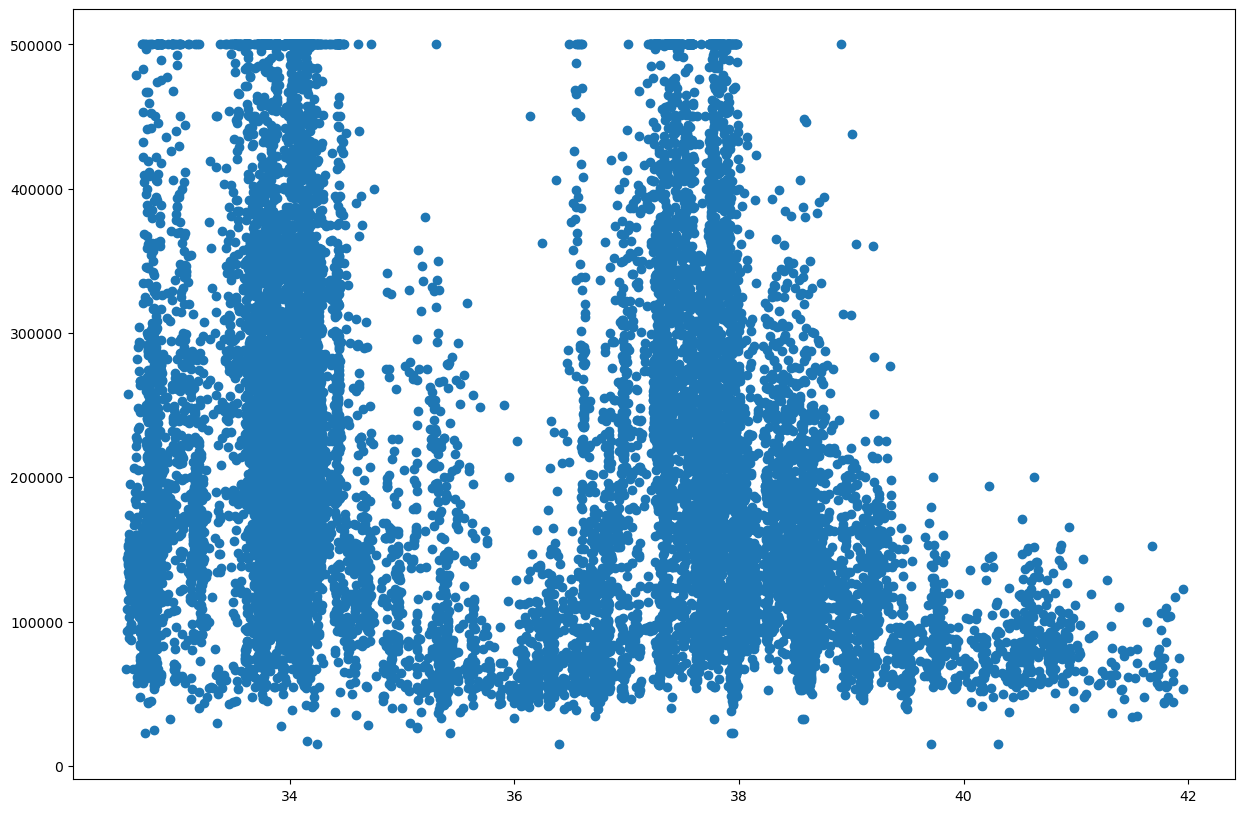

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(latitude_data.latitude,latitude_data.median_house_value)

(array([1144.,  392.,  260., 1480., 5172., 2335.,  374.,  143.,  230.,
         231.,   53.,  190.,  324.,  596.,  372., 1388., 2139., 1185.,
         591.,  880.,  269.,  263.,  139.,   88.,   65.,  151.,  108.,
          26.,   18.,   34.]),
 array([32.54      , 32.85366667, 33.16733333, 33.481     , 33.79466667,
        34.10833333, 34.422     , 34.73566667, 35.04933333, 35.363     ,
        35.67666667, 35.99033333, 36.304     , 36.61766667, 36.93133333,
        37.245     , 37.55866667, 37.87233333, 38.186     , 38.49966667,
        38.81333333, 39.127     , 39.44066667, 39.75433333, 40.068     ,
        40.38166667, 40.69533333, 41.009     , 41.32266667, 41.63633333,
        41.95      ]),
 <BarContainer object of 30 artists>)

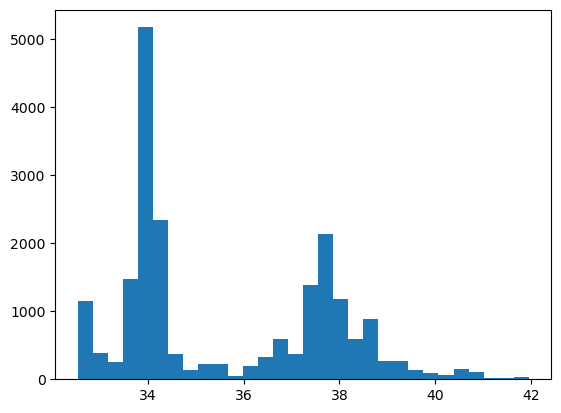

In [18]:
plt.hist(latitude_data.latitude,30)

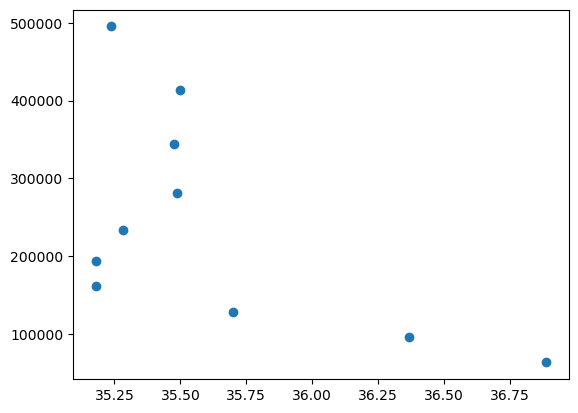

In [19]:
clustering_latitude = housing_data[['latitude','median_house_value']]
km = KMeans(10)
km.fit(clustering_latitude)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [20]:
scaler = StandardScaler()
norm_latitude = scaler.fit_transform(clustering_latitude)

pca = PCA(whiten = True)
low_latitude = pca.fit_transform(norm_latitude)

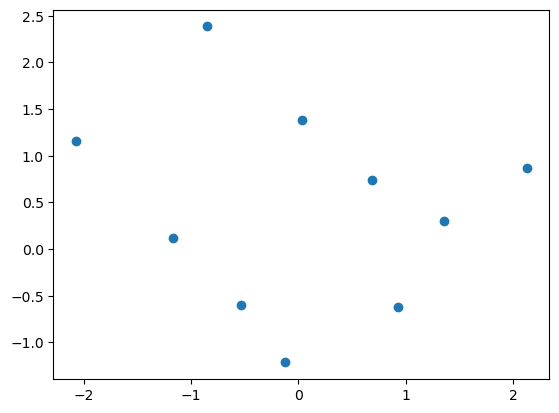

In [21]:
km = KMeans(10)
km.fit(low_latitude)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [22]:
bw = estimate_bandwidth(low_latitude)
print(bw)

1.2090661936703984


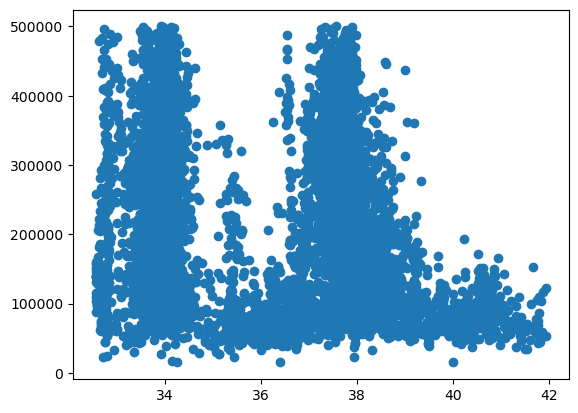

In [24]:
m1 = MeanShift(bandwidth=bw)
m1.fit(clustering_latitude)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])

In [25]:
labels = m1.labels_
cluster_centers = m1.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7380


In [90]:
linreg_data = housing_data.drop('ocean_proximity',1)

/var/folders/0h/k5lw8yhs67v3bysnqk4jmtgh0000gn/T/ipykernel_25698/3665951772.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  linreg_data = housing_data.drop('ocean_proximity',1)


In [58]:
linreg_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [136]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


latitude_X = latarray[:, np.newaxis,2]
latitude_X_train = latitude_X[:-20]
latitude_X_test = latitude_X[-20:]
latitude_y_train = latitude_X[:-20]
latitude_y_test = latitude_X[-20:]

regr = linear_model.LinearRegression()

regr.fit(latitude_X_train, latitude_y_train)

latitude_y_pred = regr.predict(latitude_X_test)

print('Coefficients: /n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(latitude_y_test,latitude_y_pred))
print('Variance score: %.2f' % r2_scare(latitude_y_test, latitude_y_pred))

plt.scatter(latitude_X_test, latitude_y_test, color = 'black')
plt.plot(latitude_X_test, latitude_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [129]:
latitude = linreg_data[['latitude','median_house_value']]

In [106]:
print(latitude)

       latitude  median_house_value
0         37.88            452600.0
1         37.86            358500.0
2         37.85            352100.0
3         37.85            341300.0
4         37.85            342200.0
...         ...                 ...
20635     39.48             78100.0
20636     39.49             77100.0
20637     39.43             92300.0
20638     39.43             84700.0
20639     39.37             89400.0

[20640 rows x 2 columns]


In [139]:
mhv =latitude.median_house_value
lat = latitude.latitude

In [145]:
latarray = lat.to_numpy()
print(latarray)
mhvarray = mhv.to_numpy()

[37.88 37.86 37.85 ... 39.43 39.43 39.37]


Coefficients: [-7724.15576789]
Mean squared error: 7592422661.68
Variance score: -15.13


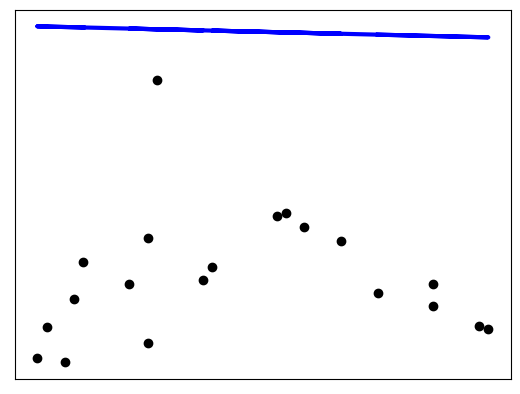

In [148]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


latitude_X = latarray[:, np.newaxis]
latitude_X_train = latitude_X[:-20]
latitude_X_test = latitude_X[-20:]
latitude_y_train = mhvarray[:-20]
latitude_y_test = mhvarray[-20:]

regr = linear_model.LinearRegression()

regr.fit(latitude_X_train, latitude_y_train)

latitude_y_pred = regr.predict(latitude_X_test)

print('Coefficients: \n' , regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(latitude_y_test,latitude_y_pred))
print('Variance score: %.2f' % r2_score(latitude_y_test, latitude_y_pred))

plt.scatter(latitude_X_test, latitude_y_test, color = 'black')
plt.plot(latitude_X_test, latitude_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()